# Projeto de MLOPS - Credit Score
Problemática: Desenvolver um modelo capaz de classificar os créditos dos indivíduos, dado uma série de features.

Equipe:
 - Aian Shay
 - Chrystinne F.
 - Diénert Vieira   
 - Ednael Vieira
 - Tassiane Barbosa

In [638]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [580]:
pd.set_option('mode.chained_assignment', None)

### Visão Geral

In [581]:
df = pd.read_csv("../data/train.csv.zip",compression='zip')

C:\Users\efvs\AppData\Local\Temp/ipykernel_23704/2569449735.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/train.csv.zip",compression='zip')


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [583]:
df.isna().sum()/100000

ID                          0.00000
Customer_ID                 0.00000
Month                       0.00000
Name                        0.09985
Age                         0.00000
SSN                         0.00000
Occupation                  0.00000
Annual_Income               0.00000
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.00000
Type_of_Loan                0.11408
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.07002
Changed_Credit_Limit        0.00000
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.00000
Outstanding_Debt            0.00000
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.04479
Payment_Behaviour           0.00000
Monthly_Balance             0.01200
Credit_Score                

`Tratamento de Dados ausentes:` Será tratado individualmente, ao excluídos, metade do dataset foi perdido

### Pré- Processamento e Análises Iniciais

## `Tratamento das Numéricas`
- Ajuste de tipos
- Eliminação de erros de formatação
- Arredondamento
- Cálculo das correlações (Pearson)

In [584]:
num_cols = [
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Delay_from_due_date',
    'Num_Credit_Inquiries',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Changed_Credit_Limit',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Num_of_Delayed_Payment',
    'Outstanding_Debt',
    'Annual_Income',
    'Num_of_Loan',
    'Age'
]

In [585]:
df_num = df[num_cols]
df_cat = df.drop(num_cols,axis=1)

df_num.reset_index(inplace=True)
df_cat.reset_index(inplace=True)

In [586]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   index                     100000 non-null  int64  
 1   Monthly_Inhand_Salary     84998 non-null   float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Delay_from_due_date       100000 non-null  int64  
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Utilization_Ratio  100000 non-null  float64
 8   Total_EMI_per_month       100000 non-null  float64
 9   Changed_Credit_Limit      100000 non-null  object 
 10  Amount_invested_monthly   95521 non-null   object 
 11  Monthly_Balance           98800 non-null   object 
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Outstanding_Debt          100000 non-null  ob

In [587]:
num_cols_issue = [
    'Changed_Credit_Limit', 'Amount_invested_monthly','Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
    'Annual_Income','Num_of_Loan','Age'
]

In [588]:
df_num.drop('index',axis=1,inplace=True)

In [589]:
df_num.head()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Changed_Credit_Limit,Amount_invested_monthly,Monthly_Balance,Num_of_Delayed_Payment,Outstanding_Debt,Annual_Income,Num_of_Loan,Age
0,1824.843333,3,4,3,3,4.0,26.822620,49.574949,11.27,80.41529543900253,312.49408867943663,7,809.98,19114.12,4,23
1,NaN,3,4,3,-1,4.0,31.944960,49.574949,11.27,118.28022162236736,284.62916249607184,NaN,809.98,19114.12,4,23
2,NaN,3,4,3,3,4.0,28.609352,49.574949,_,81.699521264648,331.2098628537912,7,809.98,19114.12,4,-500
3,NaN,3,4,3,5,4.0,31.377862,49.574949,6.27,199.4580743910713,223.45130972736786,4,809.98,19114.12,4,23
4,1824.843333,3,4,3,6,4.0,24.797347,49.574949,11.27,41.420153086217326,341.48923103222177,NaN,809.98,19114.12,4,23


In [590]:
for coluna in num_cols_issue:
    df_num.loc[:,coluna] = df_num[coluna].str.replace('_','')

In [591]:
for coluna in num_cols_issue:
    df_num.loc[:,coluna] = pd.to_numeric(df_num[coluna], downcast='float', errors='coerce')

In [592]:
print(df_num.isna().sum())

Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Delay_from_due_date             0
Num_Credit_Inquiries         1965
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Changed_Credit_Limit         2091
Amount_invested_monthly      4479
Monthly_Balance              2868
Num_of_Delayed_Payment       7002
Outstanding_Debt                0
Annual_Income                   0
Num_of_Loan                     0
Age                             0
dtype: int64


In [593]:
for coluna in df_num.columns:
    df_num[coluna] = df_num[coluna].fillna(df_num[coluna].mean())

In [594]:
print(df_num.isna().sum())

Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Delay_from_due_date         0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Changed_Credit_Limit        0
Amount_invested_monthly     0
Monthly_Balance             0
Num_of_Delayed_Payment      0
Outstanding_Debt            0
Annual_Income               0
Num_of_Loan                 0
Age                         0
dtype: int64


### Correlações entre as features Numéricas

<AxesSubplot:>

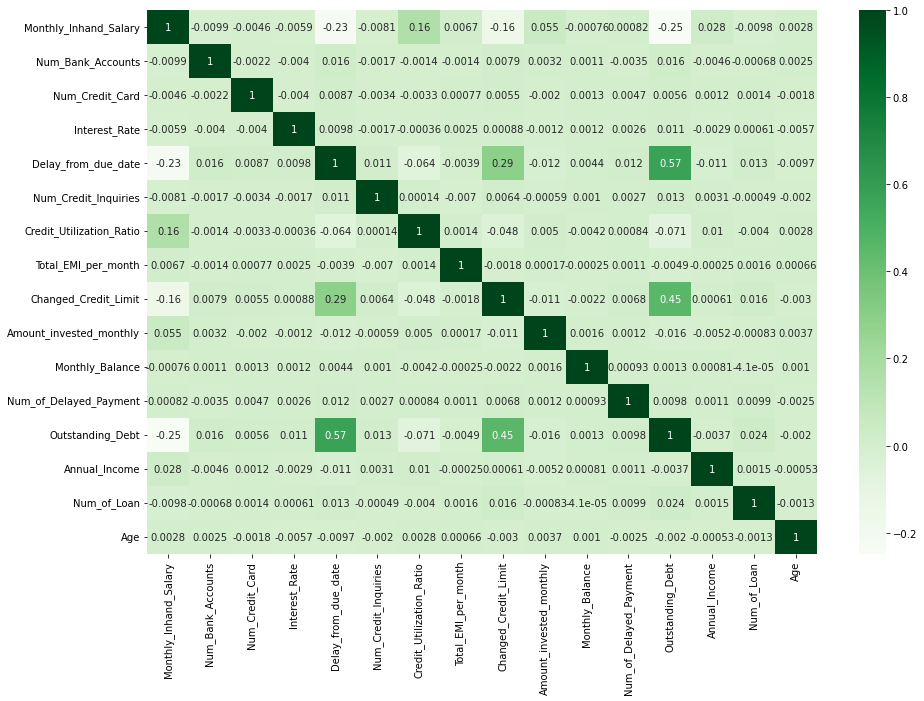

In [595]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(df_num.corr(),annot=True,cmap="Greens")

## `Categóricas`
- Tratamento de erros
- Remoção de desnecessárias
- Cálculo das correçaões (V de Cramer)
- Encoding (Ordinal e One-Hot)

In [597]:
df_cat.columns

Index(['index', 'ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Occupation',
       'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

Ajuste.1 - `Exclusão`

In [598]:
df_cat.drop(['ID','index','Name','Customer_ID','SSN'],axis=1,inplace=True)

In [599]:
df_cat.head(2)

,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,NaN,No,Low_spent_Large_value_payments,Good


In [600]:
df_cat.isna().sum()

Month                        0
Occupation                   0
Type_of_Loan             11408
Credit_Mix                   0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Payment_Behaviour            0
Credit_Score                 0
dtype: int64

Ajuste.2 - `Payment_Behaviour`

In [601]:
df_cat['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [602]:
for i in range(len(df)):
    if df_cat["Payment_Behaviour"][i] == "!@9#%8":
        df_cat["Payment_Behaviour"][i] = "Other"

In [649]:
random.choices([0,1,2,3,4,5,6])[0]

6

In [651]:
# De forma que quanto maior o numero atribuido, melhor é o perfil para concessão de crédito
def ordinal_encoder(value):
    if value == 'Low_spent_Small_value_payments ':
        return 0
    elif value == 'High_spent_Medium_value_payments':
        return 4
    elif value == 'Low_spent_Medium_value_payments':
        return 1
    elif value == 'High_spent_Large_value_payments':
        return 6
    elif value == 'High_spent_Small_value_payments':
        return 3
    elif value == 'Low_spent_Large_value_payments':
        return 2
    elif value == "Other":
        return random.choices([0,1,2,3,4,5,6])[0]

In [653]:
df_cat["Payment_Behaviour"] = df_cat["Payment_Behaviour"].apply(ordinal_encoder)

Ajuste.3 - `Credit_History_Age`
- Na verdade, deve ser uma variável numérica

In [604]:
df_cat['Credit_History_Age'].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [605]:
df.loc[:,"Credit_History_Age"]

0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [606]:
df_cat['Credit_History_Age'].fillna(0, inplace=True)

In [627]:
import re
for linha in range(len(df_cat)):
    frase = df_cat.iloc[linha,4]
    if frase != 0:
        meses = 0
        meses += int(frase.split("Years")[0]) * 12
        meses += int((re.match(r"^.*and (.*) Months.*$", frase)).group(1))
        df_cat["Credit_History_Age"][linha] = meses

In [628]:
df_cat.loc[:,"Credit_History_Age"]

0        265
1          0
2        267
3        268
4        269
        ... 
99995    378
99996    379
99997    380
99998    381
99999    382
Name: Credit_History_Age, Length: 100000, dtype: object

Ajuste.4 - `Credit_Mix // Payment_of_Min_Amount // Credit_Score`
- Distribuição percentual dos ausentes

In [609]:
df_cat['Credit_Mix'].value_counts(normalize=True)

Standard    0.36479
Good        0.24337
_           0.20195
Bad         0.18989
Name: Credit_Mix, dtype: float64

In [610]:
df_cat[df_cat['Credit_Mix']!='_']['Credit_Mix'].value_counts(normalize=True)

Standard    0.457102
Good        0.304956
Bad         0.237942
Name: Credit_Mix, dtype: float64

In [611]:
import random

In [612]:
count = 0
for avaliation in df_cat['Credit_Mix']:
    if avaliation == '_':
        df_cat['Credit_Mix'][count] = random.choices(['Good','Bad','Standard'],weights=[0.45,0.27,0.26])
    count+=1

In [613]:
df_cat['Credit_Mix'].value_counts()

Standard      36479
Good          24337
Bad           18989
[Good]         9373
[Bad]          5521
[Standard]     5301
Name: Credit_Mix, dtype: int64

In [614]:
def ordinal_encoder2(value):
    if value == 'Bad' or value == '[Bad]' or value == 'Poor':
        return 0
    elif value == 'Standard' or value == '[Standard]':
        return 1
    elif value == 'Good' or value == '[Good]':
        return 2

In [615]:
df_cat[df_cat['Payment_of_Min_Amount']!='NM']['Payment_of_Min_Amount'].value_counts(normalize=True)

Yes    0.594661
No     0.405339
Name: Payment_of_Min_Amount, dtype: float64

In [616]:
count = 0
for avaliation in df_cat['Payment_of_Min_Amount']:
    if avaliation == '_':
        df_cat['Payment_of_Min_Amount'][count] = random.choices(['Yes','No'],weights=[0.594661,0.405339])
    count+=1

In [617]:
def ordinal_encoder3(value):
    if value == 'No' or value == '[No]':
        return 0
    elif value == 'Yes' or value == '[Yes]':
        return 1

In [618]:
df_cat['Credit_Mix'] = df_cat['Credit_Mix'].apply(ordinal_encoder2)
df_cat['Payment_of_Min_Amount'] = df_cat['Payment_of_Min_Amount'].apply(ordinal_encoder3)

In [619]:
df_cat['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [620]:
df_cat['Credit_Score'] = df_cat['Credit_Score'].apply(ordinal_encoder2)

Ajuste.5 - `Occupation`

In [621]:
df_cat['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [622]:
df_cat['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [623]:
jobs = ['Scientist', 'Teacher', 'Engineer', 'Entrepreneur','Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer','Architect']

In [625]:
count = 0
for avaliation in df_cat['Occupation']:
    if avaliation == '_______':
        df_cat['Occupation'][count] = random.choices(jobs)[0]
    count+=1

In [631]:
df_cat['Occupation'].value_counts()

Lawyer           7037
Architect        6877
Engineer         6816
Mechanic         6768
Scientist        6750
Developer        6728
Accountant       6723
Media_Manager    6687
Teacher          6678
Entrepreneur     6638
Doctor           6576
Journalist       6561
Manager          6441
Musician         6370
Writer           6350
Name: Occupation, dtype: int64

Como pretendíamos, distribuimos aletoriamente nas ocorrencias de '_____', as outras profissões

In [639]:
le1 = LabelEncoder()
df_cat['Occupation'] = le1.fit_transform(df_cat['Occupation'].values)

Ajuste.6 - `Month & Loan`

In [642]:
le2 = LabelEncoder()
df_cat['Month'] = le2.fit_transform(df_cat['Month'].values)

In [644]:
le3 = LabelEncoder()
df_cat['Type_of_Loan'] = le3.fit_transform(df_cat['Type_of_Loan'].values)

In [658]:
df_cat.isna().sum()

Month                    0
Occupation               0
Type_of_Loan             0
Credit_Mix               0
Credit_History_Age       0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

In [656]:
issued_cat = ['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

In [657]:
for coluna in issued_cat:
    df_cat[coluna] = df_cat[coluna].fillna(df_cat[coluna].mean())

In [659]:
df_cat.isna().sum()

Month                    0
Occupation               0
Type_of_Loan             0
Credit_Mix               0
Credit_History_Age       0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

In [660]:
df_cat.head()

,Month,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,3,12,128,1.067013,265,0.0,3.000000,2
1,2,12,128,2.000000,0,0.0,2.000000,2
2,6,12,128,2.000000,267,0.0,1.000000,2
3,0,12,128,2.000000,268,0.0,3.278572,2
4,7,12,128,2.000000,269,0.0,4.000000,2


### `V de Cramer`

In [675]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [676]:
# Building of the confusion matrix
rows= []

for var1 in df_cat:
  col = []
  for var2 in df_cat:
    cramers =cramers_V(df_cat[var1], df_cat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_c = pd.DataFrame(cramers_results, columns = df_cat.columns, index =df_cat.columns)

<AxesSubplot:>

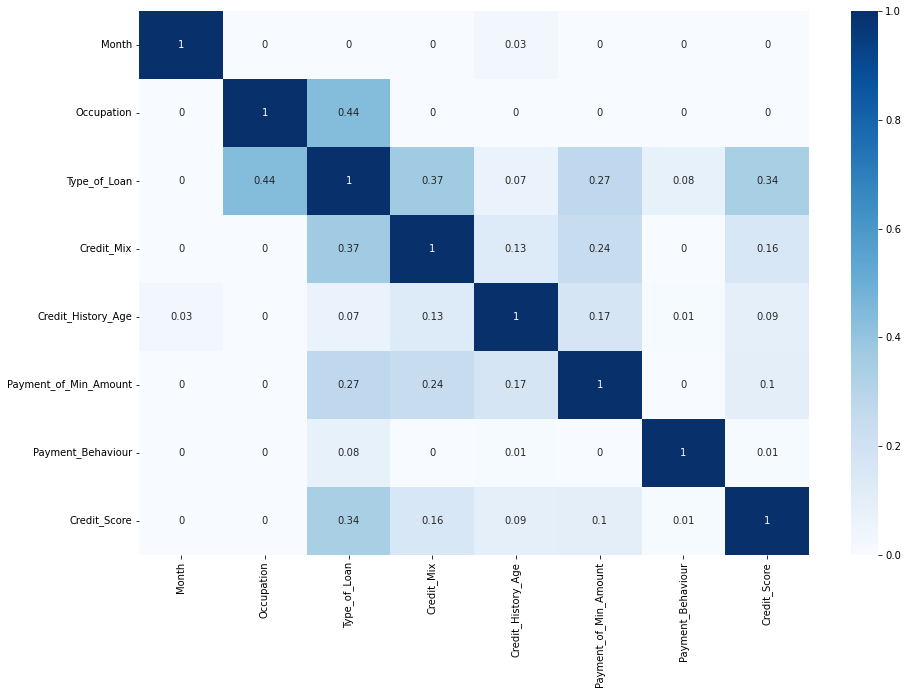

In [677]:
fig = plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(df_c,annot=True,cmap="Blues")

In [669]:
print(df_cat.shape)
print(df_num.shape)

(100000, 8)
(100000, 16)


In [672]:
df_geral = pd.concat([df_cat,df_num],axis=1)

In [674]:
df_geral.to_csv("../data/df_adjusted.csv")